In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import random
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

campos_numericos_tur = ['LimiteR$','LimiteU$', 'Qtde Tot','Val Tot','Qtde Med','Val Med','Qtde Ops','Idade']
campos_numericos_com = ['Qtde Ops', 'USD Total', 'MN Tot', 'Taxa Med', 'MN Med', 'USD Med']

# Turismo Pessoa Física

In [2]:
df = pd.read_csv('Turismo_F tratado.csv', sep=',', index_col=False)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,8,13,15,16,24,25,26,27,28,32,35,47,68,69,71,72,73,94,97,98,99,100,101,118,121,122,142,144,145,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.dropna(subset = campos_numericos_tur, inplace=True)

In [4]:
scaler = StandardScaler()

df[campos_numericos_tur] = scaler.fit_transform(df[campos_numericos_tur])


## Rodando SSE e armazenando a inertia

In [93]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
n_iten = []
max_iter = 20
for k in range(1, max_iter):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df[campos_numericos_tur])
    n_iten.append(kmeans.n_iter_)
    sse.append(kmeans.inertia_)


## Rodando Silhouette Coef

In [94]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, max_iter):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df[campos_numericos_tur])
    score = silhouette_score(df[campos_numericos_tur], kmeans.labels_)
    silhouette_coefficients.append(score)

## Plotando as 3 comparações por cluster

Text(0.5, 0, 'N Cluster')

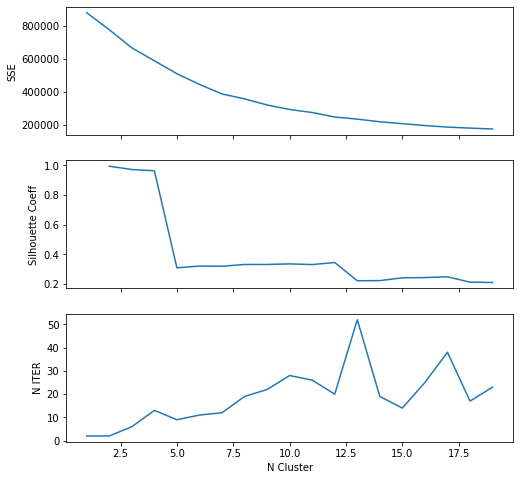

In [95]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8,8))
ax1.plot(range(1, max_iter), sse)
ax1.set_ylabel("SSE")
ax2.plot(range(2, max_iter), silhouette_coefficients)
ax2.set_ylabel("Silhouette Coeff")
ax3.plot(range(1, max_iter), n_iten)
ax3.set_ylabel("N ITER")
ax3.set_xlabel("N Cluster")

In [111]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
n_iten = []

kmeans = KMeans(n_clusters=12, **kmeans_kwargs)
kmeans.fit(df[campos_numericos_tur])
n_iten.append(kmeans.n_iter_)
sse.append(kmeans.inertia_)

score = silhouette_score(df[campos_numericos_tur], kmeans.labels_)
silhouette_coefficients.append(score)

In [112]:
print(sse, score, n_iten) #12 clusters

[246959.9905253219] 0.3453506448628887 [20]


In [104]:
print(sse, score, n_iten) #3 clusters

[666972.8248410721] 0.9711699236151577 [6]


In [107]:
print(sse, score, n_iten) #4 clusters

[588291.4455171024] 0.9625585437471534 [13]


In [113]:
len(kmeans.labels_)

110018

In [114]:
df['Cluster'] = kmeans.labels_

In [118]:
df['Cluster'].value_counts()

2     60604
0     43068
8      3802
7      1887
11      312
9       269
10       31
4        20
5        14
6         9
1         1
3         1
Name: Cluster, dtype: int64

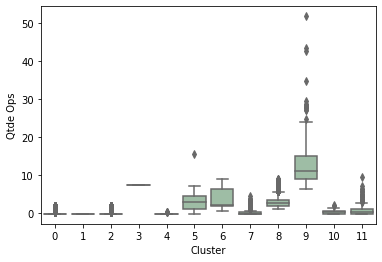

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.boxplot(x='Cluster', y='Qtde Ops', data=df, color='#99c2a2')
#ax = sns.swarmplot(x="Cluster", y='Qtde Ops', data=df, color='#7d0013')
plt.show()

In [166]:
df_grupo_pf_tur = df.groupby('Cluster')['LimiteR$','LimiteU$', 'Qtde Tot','Val Tot','Qtde Med','Val Med','Qtde Ops','Idade'].mean()

<ipython-input-166-148b6d70c0c2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_grupo_pf_tur = df.groupby('Cluster')['LimiteR$','LimiteU$', 'Qtde Tot','Val Tot','Qtde Med','Val Med','Qtde Ops','Idade'].mean()


In [167]:
df_grupo_pf_tur

,LimiteR$,LimiteU$,Qtde Tot,Val Tot,Qtde Med,Val Med,Qtde Ops,Idade
Cluster,,,,,,,,
0,-0.022940,-0.067305,-0.052198,-0.087672,-0.031569,-0.071148,-0.147261,0.987805
1,-0.130605,-0.162649,180.882356,0.433643,221.686126,2.430676,-0.288951,-0.031681
2,0.014584,-0.001590,-0.048512,-0.084419,-0.027531,-0.072064,-0.139234,-0.720149
3,117.362077,238.915394,12.289253,176.007116,0.700354,37.568406,7.389447,1.670046
4,0.283718,-0.043110,39.025425,-0.091252,41.844870,-0.005124,-0.208125,-0.740734
5,56.011536,9.842351,1.244717,6.962264,0.138555,4.116651,3.665713,0.170905
6,18.347080,41.213791,5.003205,58.887822,0.791903,34.523904,3.527797,0.574953
7,0.222097,0.731192,0.072919,1.333999,0.052802,3.575758,0.010450,-0.065875
8,-0.390829,0.146968,0.219052,0.955433,-0.012940,-0.179317,2.890700,0.281779


In [ ]:
['LimiteR$','LimiteU$', 'Qtde Tot','Val Tot','Qtde Med','Val Med','Qtde Ops','Idade']

In [177]:
from scipy import stats

F_limrs, p_limrs = stats.f_oneway(df_grupo_pf_tur['LimiteR$'],df_grupo_pf_tur.index)
F_limus, p_limus = stats.f_oneway(df_grupo_pf_tur['LimiteU$'],df_grupo_pf_tur.index)
F_qtot, p_qtot = stats.f_oneway(df_grupo_pf_tur['Qtde Tot'],df_grupo_pf_tur.index)
F_valtot, p_valtot = stats.f_oneway(df_grupo_pf_tur['Val Tot'],df_grupo_pf_tur.index)
F_qmed, p_qmed = stats.f_oneway(df_grupo_pf_tur['Qtde Med'],df_grupo_pf_tur.index)
F_valmed, p_valmed = stats.f_oneway(df_grupo_pf_tur['Val Med'],df_grupo_pf_tur.index)
F_qops, p_qops = stats.f_oneway(df_grupo_pf_tur['Qtde Ops'],df_grupo_pf_tur.index)
F_age, p_age = stats.f_oneway(df_grupo_pf_tur['Idade'],df_grupo_pf_tur.index)


In [195]:
d = {'Atributo': ['LimiteR$','LimiteU$', 'Qtde Tot','Val Tot','Qtde Med','Val Med','Qtde Ops','Idade'],
     'F_value': [F_limrs, F_limus, F_qtot, F_valtot, F_qmed, F_valmed, F_qops, F_age],
     'P_value': [p_limrs, p_limus, p_qtot, p_valtot, p_qmed, p_valmed, p_qops, p_age]
}

In [198]:
table = pd.DataFrame(d)
table


,Atributo,F_value,P_value
0,LimiteR$,1.073337,0.311447
1,LimiteU$,0.942781,0.342119
2,Qtde Tot,1.057196,0.315028
3,Val Tot,1.268271,0.272227
4,Qtde Med,0.865370,0.362336
5,Val Med,0.773069,0.388772
6,Qtde Ops,3.570172,0.072077
7,Idade,24.540981,0.000059


# Turismo Pessoa Jurídica

In [34]:
df_tur_j = pd.read_csv('Turismo_J.csv', sep=',')
df_tur_j[campos_numericos_tur] = scaler.fit_transform(df_tur_j[campos_numericos_tur])
df_tur_j.dropna(subset=campos_numericos_tur, inplace=True)

## Armazenando SSE e armazenando inertia

In [35]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
n_iten = []
max_iter = 12
for k in range(1, max_iter):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_tur_j[campos_numericos_tur])
    n_iten.append(kmeans.n_iter_)
    sse.append(kmeans.inertia_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Armazenando Silhouette Coef

In [36]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, max_iter):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_tur_j[campos_numericos_tur])
    score = silhouette_score(df_tur_j[campos_numericos_tur], kmeans.labels_)
    silhouette_coefficients.append(score)


## Plotando as 3 comparações por cluster

Text(0.5, 0, 'N Cluster')

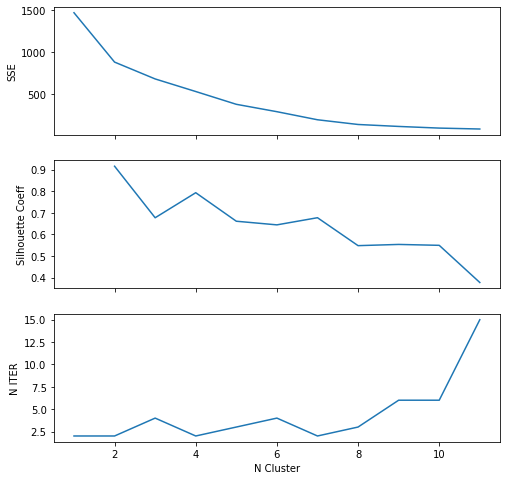

In [37]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8,8))
ax1.plot(range(1, max_iter), sse)
ax1.set_ylabel("SSE")
ax2.plot(range(2, max_iter), silhouette_coefficients)
ax2.set_ylabel("Silhouette Coeff")
ax3.plot(range(1, max_iter), n_iten)
ax3.set_ylabel("N ITER")
ax3.set_xlabel("N Cluster")

In [38]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
n_iten = []

kmeans = KMeans(n_clusters=7, **kmeans_kwargs)
kmeans.fit(df_tur_j[campos_numericos_tur])
n_iten.append(kmeans.n_iter_)
sse.append(kmeans.inertia_)

score = silhouette_score(df_tur_j[campos_numericos_tur], kmeans.labels_)
silhouette_coefficients.append(score)

In [39]:
print(sse, score, n_iten)

[194.78116899392373] 0.6775173564824569 [2]


In [40]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 5, 5, 6, 5,
       2, 6, 0, 0, 5, 5, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 5, 5, 5, 0, 0, 5, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
df_tur_j['Cluster'] = kmeans.labels_

In [42]:
df_tur_j['Cluster'].value_counts()

0    172
5     15
6      3
1      1
2      1
3      1
4      1
Name: Cluster, dtype: int64

# Comercial Pessoa Física

In [19]:
df_com_f = pd.read_csv('Comercial_F.csv', sep=',')
df_com_f[campos_numericos_com] = scaler.fit_transform(df_com_f[campos_numericos_com])
df_com_f.dropna(subset=campos_numericos_com, inplace=True)

In [20]:
df_com_f.head(3)

,Unnamed: 0,CD_CLIENTE,CD_TIPO_PESSOA,NO_DOCUMENTO,NM_FANTASIA,CD_CLASSIFICACAO_RISCO,CD_USUARIO_INC,CD_USUARIO_ATU,CD_SITUACAO,CD_CLASSIFICACAO,...,DS_COMPLEMENTO,DS_ENDERECO,NM_BAIRRO,CEP,MN Tot,USD Total,Taxa Med,MN Med,USD Med,Qtde Ops
1,ANTONIO CARLOS GOMES NEVES,430.0,F,5.203173e+10,ANTONIO CARLOS GOMES NEVE,NaN,INTEGRACAO GN,ADMIN,BLOQUEADO,EVENTUAL,...,AP 124,DOUTOR EPITÁCIO PESSOA,BOQUEIRÃO,11045300.0,-0.347318,-0.356915,-0.016524,-0.379226,-0.395448,-0.439345
2,JOSE ANTONIO BELLINI,431.0,F,2.701119e+10,ELETRO MICA LTDA,NaN,INTEGRACAO GN,JCLEMENTE,BLOQUEADO,PERMANENTE,...,NaN,RUA JOSÉ MONTANHAN,CHÁCARAS RESIDENCIAIS SANTA MARIA,18119301.0,-0.323394,-0.324891,-0.927091,-0.362366,-0.369126,-0.135142
4,JOSEPH FRANCISCO MATTHEWS,434.0,F,4.400063e+10,JOSEPH FRANCISCO MATTHEWS,NaN,INTEGRACAO GN,JCLEMENTE,BLOQUEADO,EVENTUAL,...,NaN,DAS SÁLVIAS,CITY CASTELLO,13308622.0,-0.151464,-0.089544,-0.970257,-0.138360,-0.057424,0.169062


In [21]:
df_com_f.shape

(565, 38)

## Armazenando SSE e inertia

In [22]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
n_iten = []
max_iter = 20
for k in range(1, max_iter):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_com_f[campos_numericos_com])
    n_iten.append(kmeans.n_iter_)
    sse.append(kmeans.inertia_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


## Armazenando Silhouette Coef

In [23]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, max_iter):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_com_f[campos_numericos_com])
    score = silhouette_score(df_com_f[campos_numericos_com], kmeans.labels_)
    silhouette_coefficients.append(score)


## Plotando as 3 comparações por cluster

In [24]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

Text(0.5, 0, 'N Cluster')

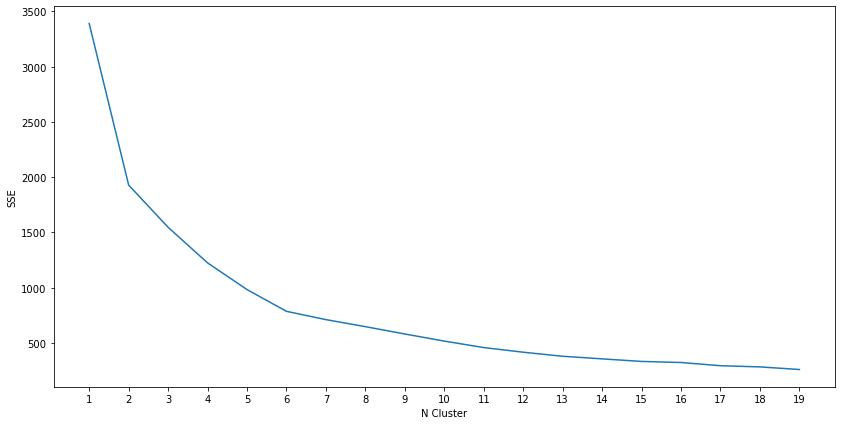

In [25]:
f, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(14,7))
plt.xticks(range(1, max_iter))
ax1.plot(range(1, max_iter), sse)
ax1.set_ylabel("SSE")
ax1.set_xlabel("N Cluster")


Text(0.5, 0, 'N Cluster')

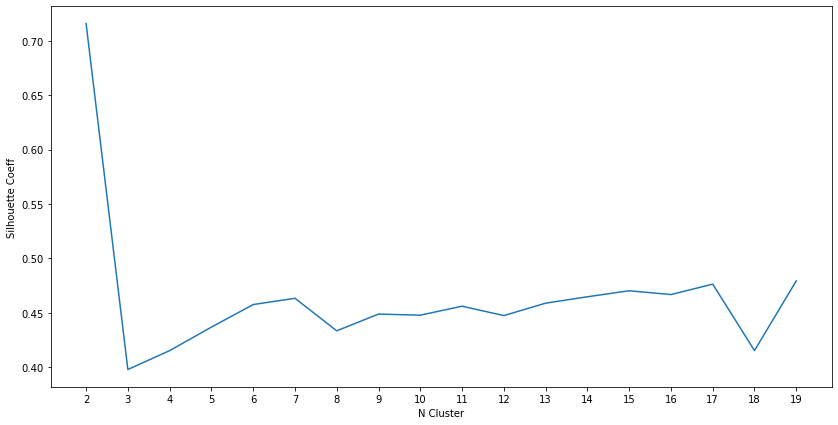

In [26]:
f, (ax2) = plt.subplots(1, 1, sharex=True, figsize=(14,7))
plt.xticks(range(1, max_iter))

ax2.plot(range(2, max_iter), silhouette_coefficients)
ax2.set_ylabel("Silhouette Coeff")
ax2.set_xlabel("N Cluster")


In [33]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
n_iten = []

kmeans = KMeans(n_clusters=6, **kmeans_kwargs)
kmeans.fit(df_com_f[campos_numericos_com])
n_iten.append(kmeans.n_iter_)
sse.append(kmeans.inertia_)

score = silhouette_score(df_com_f[campos_numericos_com], kmeans.labels_)
silhouette_coefficients.append(score)
    


In [28]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
n_iten = []
cluster = []
max_iter = 20
for k in range(1, max_iter):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_com_f[campos_numericos_com])
    n_iten.append(kmeans.n_iter_)
    sse.append(kmeans.inertia_)
    cluster.append(k)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [34]:
print(cluster, sse, score)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] [785.0792069410089] 0.45754315865207146


In [35]:
len(kmeans.labels_)

565

In [36]:
df_com_f['Cluster'] = kmeans.labels_

In [37]:
df_com_f['Cluster'].value_counts()

4    260
2    219
1     42
0     24
5     15
3      5
Name: Cluster, dtype: int64

In [38]:
df_com_f.groupby('Cluster')['Qtde Ops', 'USD Total', 'MN Tot', 'Taxa Med', 'MN Med', 'USD Med'].mean()

<ipython-input-38-82fa233a46bc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_com_f.groupby('Cluster')['Qtde Ops', 'USD Total', 'MN Tot', 'Taxa Med', 'MN Med', 'USD Med'].mean()


,Qtde Ops,USD Total,MN Tot,Taxa Med,MN Med,USD Med
Cluster,,,,,,
0,2.957591,0.985287,0.918494,-0.081046,0.084371,0.086671
1,0.031446,0.823232,0.750478,0.093902,1.604111,1.804326
2,-0.229597,-0.282980,-0.288518,-0.950008,-0.251229,-0.233456
3,-0.135142,2.419807,2.615401,0.701858,7.225023,6.765599
4,-0.239273,-0.314354,-0.299313,0.754803,-0.309323,-0.346004
5,2.724369,4.892188,4.957723,0.419649,1.994695,1.959877


In [40]:
df_com_f.columns

Index(['Unnamed: 0', 'CD_CLIENTE', 'CD_TIPO_PESSOA', 'NO_DOCUMENTO',
       'NM_FANTASIA', 'CD_CLASSIFICACAO_RISCO', 'CD_USUARIO_INC',
       'CD_USUARIO_ATU', 'CD_SITUACAO', 'CD_CLASSIFICACAO', 'TS_ALTERACAO',
       'BALANÇO PATRIMONIAL', 'CARTAO DE ASSINATURA', 'CARTÃO CNPJ',
       'CERTIDAO DA JUNTA COMERCIAL', 'COMPROVANTE DE ENDEREÇO',
       'CONTRATO SOCIAL', 'DECLARAÇÃO DE IMPOSTO DE RENDA',
       'DOCUMENTO DE IDENTIFICAÇÃO (RG/CPF/CNH)',
       'DRE - DEMONSTRATIVO DO RESULTADO DO EXERCICIO', 'FATURAMENTO',
       'FICHA CADASTRAL PF', 'FICHA CADASTRAL PJ', 'KYC', 'PROCURAÇÃO',
       'RECIBO DE ENTREGA DA DECLARAÇÃO DE IR',
       'RG OU CNH SÓCIOS / PRODUCRADORE / REPRESENTANTES', 'NO_ENDERECO',
       'DS_COMPLEMENTO', 'DS_ENDERECO', 'NM_BAIRRO', 'CEP', 'MN Tot',
       'USD Total', 'Taxa Med', 'MN Med', 'USD Med', 'Qtde Ops', 'Cluster'],
      dtype='object')

In [53]:
df_com_f.groupby('Cluster')['NM_BAIRRO'].value_counts(ascending = False)

Cluster  NM_BAIRRO            
0        ALTO DAS PALMEIRAS       1
         CAMPO BELO               1
         CAMPO COMPRIDO           1
         CENTRO                   1
         CHACARAS REUNIDAS IPE    1
                                 ..
5        ESTÂNCIA SÃO PEDRO ZR    1
         JD ALVORADA              1
         SETOR CENTRAL            1
         SOLAR CAMPESTRE          1
         VILA GERTRUDES           1
Name: NM_BAIRRO, Length: 442, dtype: int64

# Comercial Pessoa Jurídica

In [5]:
df_com_j = pd.read_csv('Comercial_J.csv', sep=',')
df_com_j[campos_numericos_com] = scaler.fit_transform(df_com_j[campos_numericos_com])
df_com_j.dropna(subset=campos_numericos_com, inplace=True)

In [6]:
df_com_j.shape

(233, 38)

## Armazenando SSE e inertia

In [7]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
n_iten = []
max_iter = 20
for k in range(1, max_iter):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_com_j[campos_numericos_com])
    n_iten.append(kmeans.n_iter_)
    sse.append(kmeans.inertia_)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Armazenando Silhouette Coef

In [8]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, max_iter):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_com_j[campos_numericos_com])
    score = silhouette_score(df_com_j[campos_numericos_com], kmeans.labels_)
    silhouette_coefficients.append(score)


## Plotando as 3 comparações por cluster

Text(0.5, 0, 'N Cluster')

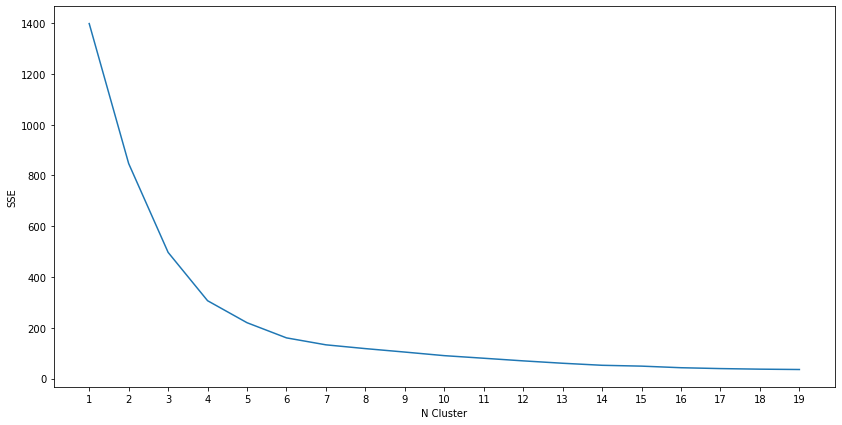

In [9]:
f, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(14,7))
plt.xticks(range(1, max_iter))
ax1.plot(range(1, max_iter), sse)
ax1.set_ylabel("SSE")
ax1.set_xlabel("N Cluster")

Text(0.5, 0, 'N Cluster')

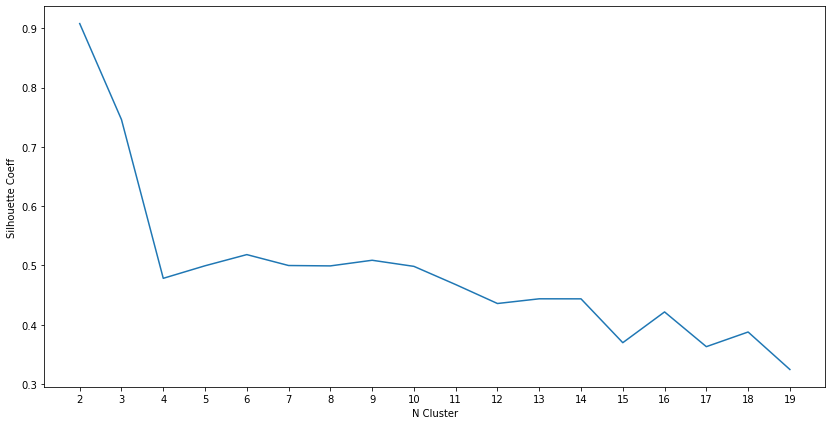

In [10]:
f, (ax2) = plt.subplots(1, 1, sharex=True, figsize=(14,7))
plt.xticks(range(1, max_iter))

ax2.plot(range(2, max_iter), silhouette_coefficients)
ax2.set_ylabel("Silhouette Coeff")
ax2.set_xlabel("N Cluster")


Text(0.5, 0, 'N Cluster')

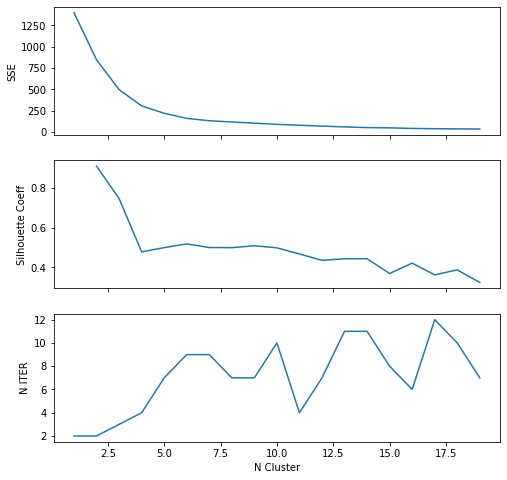

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(8,8))
ax1.plot(range(1, max_iter), sse)
ax1.set_ylabel("SSE")
ax2.plot(range(2, max_iter), silhouette_coefficients)
ax2.set_ylabel("Silhouette Coeff")
ax3.plot(range(1, max_iter), n_iten)
ax3.set_ylabel("N ITER")
ax3.set_xlabel("N Cluster")

In [12]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
n_iten = []

kmeans = KMeans(n_clusters=6, **kmeans_kwargs)
kmeans.fit(df_com_j[campos_numericos_com])
n_iten.append(kmeans.n_iter_)
sse.append(kmeans.inertia_)

score = silhouette_score(df_com_j[campos_numericos_com], kmeans.labels_)
silhouette_coefficients.append(score)

In [13]:
print(sse, score, n_iten)

[160.21107781036474] 0.5181141154154594 [9]


In [14]:
len(kmeans.labels_)

233

In [15]:
df_com_j['Cluster'] = kmeans.labels_

In [16]:
df_com_j['Cluster'].value_counts()

3    97
5    96
0    29
4     7
2     3
1     1
Name: Cluster, dtype: int64

In [17]:
df_com_j.groupby('Cluster')['Qtde Ops', 'USD Total', 'MN Tot', 'Taxa Med', 'MN Med', 'USD Med'].mean()

<ipython-input-17-3a322f540196>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_com_j.groupby('Cluster')['Qtde Ops', 'USD Total', 'MN Tot', 'Taxa Med', 'MN Med', 'USD Med'].mean()


,Qtde Ops,USD Total,MN Tot,Taxa Med,MN Med,USD Med
Cluster,,,,,,
0,-0.069464,0.215124,0.235772,0.041713,0.851951,0.941722
1,15.181634,12.861093,12.322715,-0.661310,-0.564316,-0.590268
2,0.228151,3.864917,4.247112,0.434879,1.465890,1.435519
3,-0.059967,-0.131376,-0.154311,-0.954347,-0.365188,-0.325503
4,-0.100406,0.071920,0.122292,0.593299,4.721964,4.613841
5,-0.076374,-0.192233,-0.185305,0.901724,-0.272609,-0.330722
